# EDA

## Import and Initial Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from datetime import datetime, timezone

In [2]:
df=pd.read_json('./data/gp_space_track_03MAR2022.json',orient='records')

Library and data input

In [3]:
df.head(5)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:37:47,18 SPCS,EXPLORER 1,1958-001A,EARTH,TEME,UTC,SGP4,...,None,None,None,None,1970-03-31,33954,8837957,0 EXPLORER 1,1 00004U 58001 A 70090.03500497 .07718844 +0...,2 00004 033.1468 334.6171 0024739 311.5310 048...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T03:48:30,18 SPCS,VANGUARD 1,1958-002B,EARTH,TEME,UTC,SGP4,...,SMALL,US,1958-03-17,AFETR,None,3341695,197637637,0 VANGUARD 1,1 00005U 58002B 22061.76964442 .00000283 0...,2 00005 34.2577 108.1274 1845170 277.3809 62...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:35:23,18 SPCS,SPUTNIK 3,1958-004B,EARTH,TEME,UTC,SGP4,...,None,None,None,None,1960-04-06,33906,8671641,0 SPUTNIK 3,1 00008U 58004 B 60095.16166626 .02607090 +0...,2 00008 065.0599 163.5585 0088318 135.6760 224...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:35:20,18 SPCS,EXPLORER 4,1958-005A,EARTH,TEME,UTC,SGP4,...,None,None,None,None,1959-10-23,33905,8671482,0 EXPLORER 4,1 00009U 58005 A 59275.28696823 .00892850 +0...,2 00009 050.2549 082.4216 0254534 057.7226 303...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T03:48:30,18 SPCS,VANGUARD 2,1959-001A,EARTH,TEME,UTC,SGP4,...,MEDIUM,US,1959-02-17,AFETR,None,3341695,197637638,0 VANGUARD 2,1 00011U 59001A 22061.82920175 .00000931 0...,2 00011 32.8660 234.6058 1466560 171.2210 191...


In [4]:
df.shape

(50468, 40)

In [5]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [6]:
df.dtypes

CCSDS_OMM_VERS           int64
COMMENT                 object
CREATION_DATE           object
ORIGINATOR              object
OBJECT_NAME             object
OBJECT_ID               object
CENTER_NAME             object
REF_FRAME               object
TIME_SYSTEM             object
MEAN_ELEMENT_THEORY     object
EPOCH                   object
MEAN_MOTION            float64
ECCENTRICITY           float64
INCLINATION            float64
RA_OF_ASC_NODE         float64
ARG_OF_PERICENTER      float64
MEAN_ANOMALY           float64
EPHEMERIS_TYPE           int64
CLASSIFICATION_TYPE     object
NORAD_CAT_ID             int64
ELEMENT_SET_NO           int64
REV_AT_EPOCH             int64
BSTAR                  float64
MEAN_MOTION_DOT        float64
MEAN_MOTION_DDOT       float64
SEMIMAJOR_AXIS         float64
PERIOD                 float64
APOAPSIS               float64
PERIAPSIS              float64
OBJECT_TYPE             object
RCS_SIZE                object
COUNTRY_CODE            object
LAUNCH_D

Review of overall dataset above, and below the general output found for each entry.

In [7]:
df.iloc[1]

CCSDS_OMM_VERS                                                         2
COMMENT                                GENERATED VIA SPACE-TRACK.ORG API
CREATION_DATE                                        2022-03-03T03:48:30
ORIGINATOR                                                       18 SPCS
OBJECT_NAME                                                   VANGUARD 1
OBJECT_ID                                                      1958-002B
CENTER_NAME                                                        EARTH
REF_FRAME                                                           TEME
TIME_SYSTEM                                                          UTC
MEAN_ELEMENT_THEORY                                                 SGP4
EPOCH                                         2022-03-02T18:28:17.277888
MEAN_MOTION                                                    10.848696
ECCENTRICITY                                                    0.184517
INCLINATION                                        

What is nice about this dataset instead of garnering just two line element (TLE) data, is that the orbital elements are already split out in their own record/column.  The TLE element data is still needed when using the SGP4 library to propagate the orbits.

In [8]:
df['REF_FRAME'].value_counts()

TEME    50468
Name: REF_FRAME, dtype: int64

Entire dataset is in True equator mean equinox, this is an inertia frame that is centered at the Earth’s and is not rotating with respect to the stars.  This is sufficient for the purposes of this study.

In [9]:
df['MEAN_ELEMENT_THEORY'].value_counts()

SGP4    50468
Name: MEAN_ELEMENT_THEORY, dtype: int64

The general pertubation theory used for the entire set is SGP4.

In [10]:
df.isnull().sum().sort_values(ascending=False).head(10)

DECAY_DATE          25840
RCS_SIZE            12299
SITE                11046
LAUNCH_DATE         11043
COUNTRY_CODE        11041
OBJECT_ID              74
PERIAPSIS               0
MEAN_MOTION_DOT         0
MEAN_MOTION_DDOT        0
SEMIMAJOR_AXIS          0
dtype: int64

Decay date is the set time when the satellite is calculated to drop out of orbit due to forces such as atmospheric drag.  Many of the satellites will not have a value assigned because there is not a known decay date yet.

This dataset not only contains satellites/objects currently in orbit, but also satellites as we have just seen that are no longer in orbit.

In [11]:
df['OBJECT_TYPE'].value_counts()

DEBRIS         31731
PAYLOAD        11499
ROCKET BODY     5985
TBA             1253
Name: OBJECT_TYPE, dtype: int64

In [12]:
d1=df['NORAD_CAT_ID'].value_counts()>1

In [13]:
d1.values[0]

False

In [14]:
filter1=[]
for i in range(len(d1)):
    if d1.values[i]: filter1.append(d1.index[i])

In [15]:
filter1

[]

There are a few entries that have the same NORAD category ID.  We will want to suppress the duplicates in this care or just drop given how few entries in this set exist.  If we continuously use updated sets however or make this code general it might be better to just make sure the duplicated entry is dropped.

My understanding is that duplicated values are a consequence of NORAD picking up the same satellite twice during a data pull.

In [16]:
df[df['NORAD_CAT_ID'].isin(filter1)].head(5)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2


No duplicates in this dataset, but it is something to be mindful of

In [17]:
len(df['OBJECT_NAME'].unique())

13395

### Cleaning and Slicing

There are decayed satellites in the dataset, these will need to be removed.  It's a safe assumption for the purpose of this study to remove everything ~14 days prior to the data pull date.  In this case that is 03MAR2022.

In [18]:
df=df[df['EPOCH']>'2022-02-20T00:00:00'].copy(deep=True)

In [19]:
df.shape

(23934, 40)

In [20]:
df.isnull().sum().sort_values(ascending=False).head(10)

DECAY_DATE          23929
RCS_SIZE             1116
SITE                  717
LAUNCH_DATE           717
COUNTRY_CODE          717
PERIAPSIS               0
BSTAR                   0
MEAN_MOTION_DOT         0
MEAN_MOTION_DDOT        0
SEMIMAJOR_AXIS          0
dtype: int64

Now the vast majority of our satellites do not have an assigned decay date, which is far more inline with what we expect in our active satellite dataset.

In [21]:
df['OBJECT_TYPE'].value_counts()

DEBRIS         13045
PAYLOAD         7838
ROCKET BODY     2074
TBA              977
Name: OBJECT_TYPE, dtype: int64

In [22]:
df[df['OBJECT_TYPE']=='DEBRIS'].shape[0]/df.shape[0]

0.545040528118994

Per the data set, we have ~54.5% of the objects in orbit categorized as debris, however one might want to think of anything that is not a payload as an element of debris.  Additionally of the payloads in this set, only so many are currently active satellites capable of maneuvers.

In [23]:
df['ECCENTRICITY'].describe()

count    23934.000000
mean         0.063016
std          0.173198
min          0.000004
25%          0.001114
50%          0.004058
75%          0.014418
max          0.894916
Name: ECCENTRICITY, dtype: float64

Vast majority of the orbits are low eccentricity, close to circular orbits.

In [24]:
df[df['ECCENTRICITY']>0.0144].ECCENTRICITY.describe()

count    5986.000000
mean        0.241211
std         0.278501
min         0.014409
25%         0.022529
50%         0.057361
75%         0.536053
max         0.894916
Name: ECCENTRICITY, dtype: float64

Even only the upper 25% of eccentrcity values fall in the more elliptical orbit shape

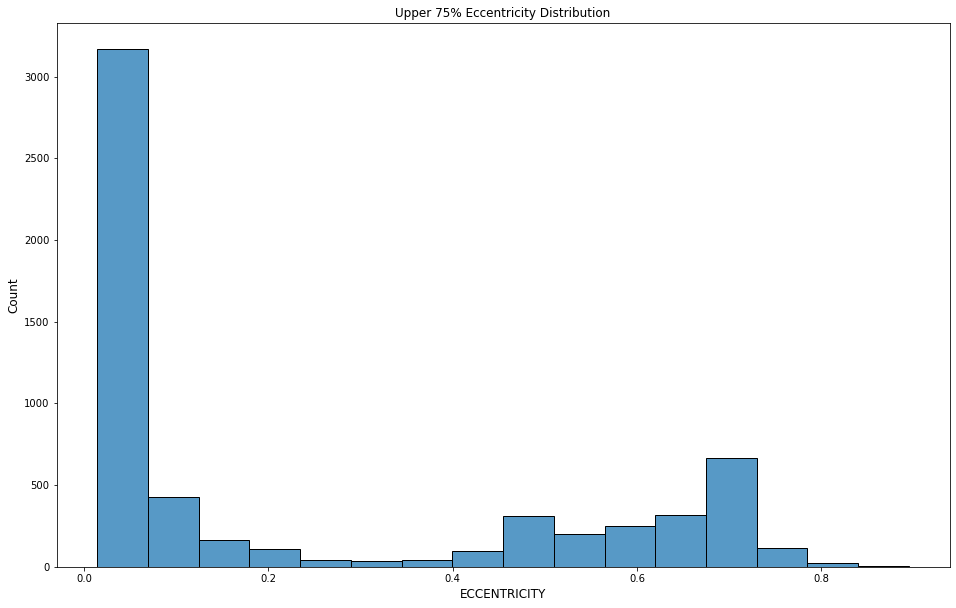

In [25]:
plt.figure(figsize=(16,10))
plt.title('Upper 75% Eccentricity Distribution',size=12)
plt.xlabel('ECCENTRICITY', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df[df['ECCENTRICITY']>0.0145], x="ECCENTRICITY");

Since the eccentricity of 0 would be a circle the vast majority of our obrits are close to circular.  There are however a good deal of objects that do have far more elliptical orbits (histogram of everything above the 75% mark of the entire set for eccentricities)

In [26]:
df['SEMIMAJOR_AXIS'].describe()

count     23934.000000
mean      11316.759501
std       10487.391389
min        6509.054000
25%        6988.425000
50%        7227.085500
75%        7806.234500
max      372747.630000
Name: SEMIMAJOR_AXIS, dtype: float64

Earth diameter is 12742 km, therefore a 6371 km radius gives a nice relational distance to our semi-major axis.  Just assuming circular orbits for all orbits for a moment lets look at all satellites that are in the low earth orbit category (orbit is encompassed within 2000 km altitude)

In [27]:
df[df['SEMIMAJOR_AXIS']<8371].shape

(19547, 40)

In [28]:
df[df['SEMIMAJOR_AXIS']<8371].shape[0]/df.shape[0]

0.8167042700760424

Potentially 81% of the satellites in our dataset are in low earth orbit.  If the apogee and perigee are both underneath 2000 km then that satellite is always less then 2000 km in altiude.

In [29]:
df[(df['APOAPSIS']<2000) & (df['PERIAPSIS']<2000)].shape

(19139, 40)

Again since most of our orbits are close to circular the previous assumption was mostly correct.  Most of our data-set is in low earth obrit.

In [30]:
df[(df['APOAPSIS']<2000) & (df['PERIAPSIS']<2000) & (df['OBJECT_NAME'].str.contains('DEB'))].shape

(11218, 40)

In [31]:
(df[(df['APOAPSIS']<2000) & (df['PERIAPSIS']<2000) & (df['OBJECT_NAME'].str.contains('DEB'))].shape[0])/df[df['OBJECT_NAME'].str.contains('DEB')].shape[0]

0.8693428394296342

Also looking at the object_type categorization.

This presents an interesting potentially focus point of the project.  Potentially honing the target of the study to be focusing on low earth satellites and debris.  

Note: SpaceTrack does define debris as: Any object with the string 'DEB' or 'COOLANT' or 'SHROUD' or 'WESTFORD NEEDLES' in the SATCAT object common name.  In low earth, there are ~100 objects that have 'COOLANT' in the name, but its potentially easier to view this count from OBJECT_TYPE.

In [32]:
df[df['OBJECT_NAME'].str.contains('STARLINK')].head(5)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
42028,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T06:36:15,18 SPCS,STARLINK-24,2019-029D,EARTH,TEME,UTC,SGP4,...,LARGE,US,2019-05-24,AFETR,None,3341808,197665955,0 STARLINK-24,1 44238U 19029D 22061.97935117 .00027606 0...,2 44238 52.9982 244.8552 0000889 72.1921 287...
42039,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T06:26:15,18 SPCS,STARLINK-61,2019-029Q,EARTH,TEME,UTC,SGP4,...,LARGE,US,2019-05-24,AFETR,None,3341759,197664327,0 STARLINK-61,1 44249U 19029Q 22062.12568094 .00051102 0...,2 44249 52.9775 207.3375 0004851 177.6783 182...
42042,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T03:48:30,18 SPCS,STARLINK-71,2019-029T,EARTH,TEME,UTC,SGP4,...,LARGE,US,2019-05-24,AFETR,None,3341695,197657262,0 STARLINK-71,1 44252U 19029T 22061.89669220 .00026021 0...,2 44252 53.0013 242.9456 0002635 353.8315 6...
42072,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-02T22:26:15,18 SPCS,STARLINK-80,2019-029AZ,EARTH,TEME,UTC,SGP4,...,LARGE,US,2019-05-24,AFETR,None,3341428,197630689,0 STARLINK-80,1 44282U 19029AZ 22061.51885127 .00066433 0...,2 44282 53.0134 142.7215 0006188 9.1628 350...
42501,2,GENERATED VIA SPACE-TRACK.ORG API,2022-03-03T03:48:30,18 SPCS,STARLINK-1007,2019-074A,EARTH,TEME,UTC,SGP4,...,LARGE,US,2019-11-11,AFETR,None,3341695,197656299,0 STARLINK-1007,1 44713U 19074A 22061.86713943 .00000738 0...,2 44713 53.0537 295.9284 0001579 86.7477 273...


Looks like we can sort our data by the Starlink satellites as well.

In [33]:
df[df['OBJECT_NAME'].str.contains('STARLINK')].shape[0]

1919

In [34]:
df['COUNTRY_CODE'].unique()

array(['US', 'CA', 'CIS', 'ITSO', 'FR', 'GER', 'UK', 'AUS', 'NATO', 'PRC',
       'JPN', 'SPN', 'FGER', 'INDO', 'ESA', 'IT', 'IND', 'EUTE', 'ARGN',
       'AB', 'BRAZ', 'MEX', 'SWED', 'RP', 'NETH', 'SES', 'CZCH', 'AC',
       'NOR', 'IM', 'SKOR', 'GREC', 'POR', 'EUME', 'THAI', 'TURK', 'ORB',
       'UKR', 'ISRA', 'MALA', 'PAKI', 'GLOB', 'EGYP', 'CHLE', 'STCT',
       'ISS', 'ROC', 'DEN', 'SAFR', 'SEAL', 'CHBZ', 'SAUD', 'UAE', 'NICO',
       'ALG', 'NIG', 'USBZ', 'IRAN', 'KAZ', 'COL', 'RASC', 'VTNM', 'VENZ',
       'SWTZ', 'SING', 'LUXE', 'BELA', 'NKOR', 'AZER', 'ASRA', 'ECU',
       'EST', 'O3B', 'QAT', 'POL', 'PER', 'BOL', 'FRIT', 'BEL', 'URY',
       'IRAQ', 'TMMC', 'LAOS', 'BERM', 'LTU', 'FIN', 'BGR', 'TBD', 'MA',
       'AGO', 'BGD', 'JOR', 'SDN', 'RWA', 'SVN', 'NZ', 'PRY', 'TUN',
       'HUN', 'MMR', 'MUS', 'KWT', None], dtype=object)

In [35]:
df['COUNTRY_CODE'].value_counts().head(10)

US      8226
CIS     7849
PRC     4114
FR       529
UK       482
JPN      282
IND      211
ESA      133
TBD      131
ITSO      91
Name: COUNTRY_CODE, dtype: int64

Not surprisingly the US is the more prominent state, with CIS nations (think ex-USSR states) coming in second, and PRC being China in third.

In [36]:
df1=df.copy(deep=True)

In [37]:
df2=df1[~df1['LAUNCH_DATE'].isnull()].copy(deep=True)

In [38]:
df2.shape

(23217, 40)

In [39]:
df2['LAUNCH_DATE'] = pd.to_datetime(df2.LAUNCH_DATE, 
                             format='%Y/%m/%d', 
                             errors='coerce')

In [40]:
df2['CPLOT']=df2['COUNTRY_CODE'].apply(lambda x: x if x in ['US','PRC','CIS'] else 'Other')

Creating another column for a plot

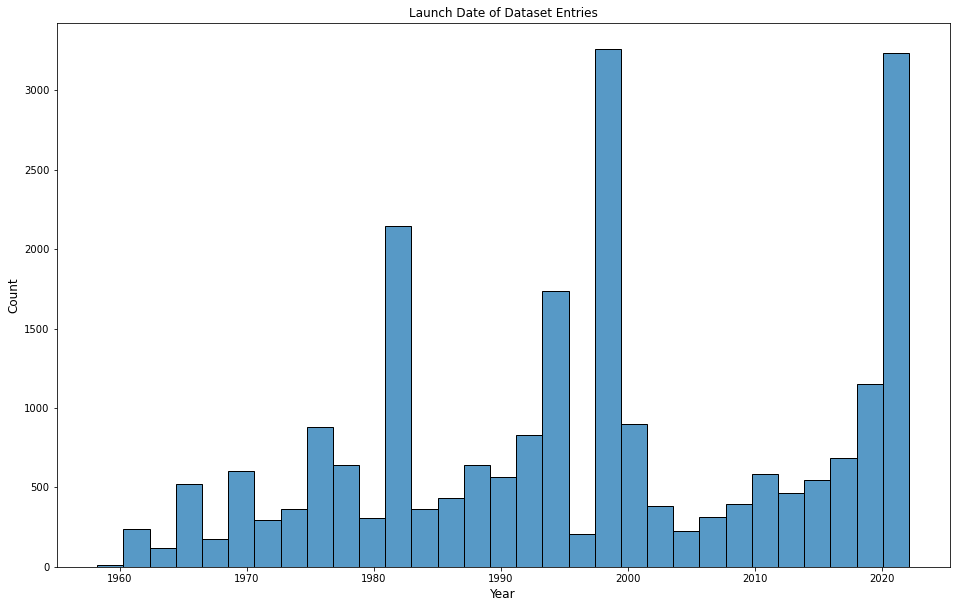

In [41]:
plt.figure(figsize=(16,10))
plt.title('Launch Date of Dataset Entries',size=12)
plt.xlabel('Year', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df2,
             x='LAUNCH_DATE',
            );

Quick plot of a launch date tally.   The early 2000s were a lot less active then I would have expected.  The upswing in the late 2010's -> 2020's are probably in part a consequence of SpaceX now deploying Starlink.

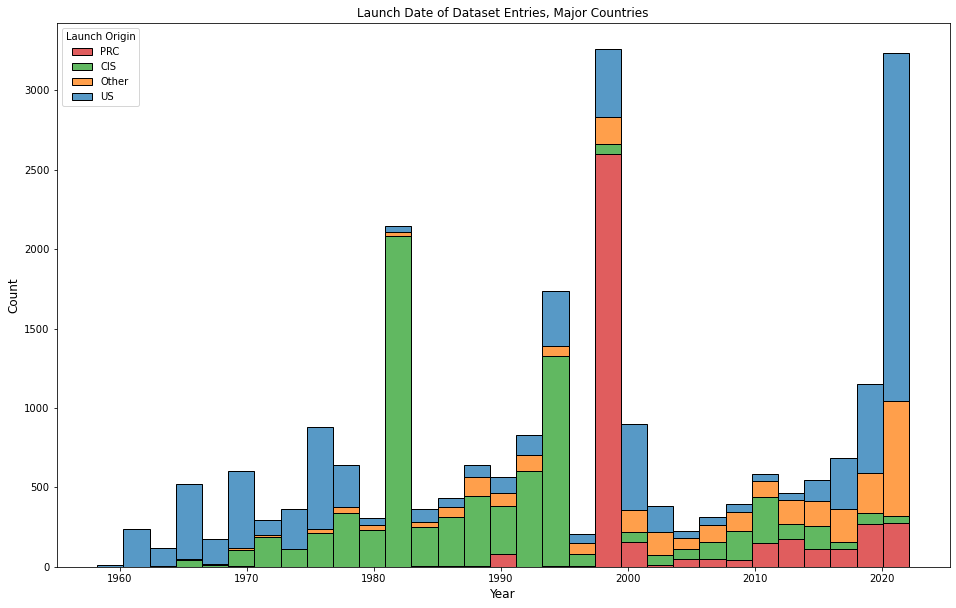

In [58]:
plt.figure(figsize=(16,10))
plt.title('Launch Date of Dataset Entries, Major Countries',size=12)
plt.xlabel('Year', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df2,x='LAUNCH_DATE',hue='CPLOT',multiple='stack');
plt.legend(title='Launch Origin', loc='upper left', labels=['PRC', 'CIS','Other','US']);
#plt.savefig(fname='Launch_countries.png')

It's very interesting to see the activity of the three major players change over time.  The USSR in the late 70s and 80s had a large number of launches.  China had a major push in the late 90s and is only beginning to pick up steam again.  The US has massively increased launches thanks to SpaceX becoming a major player in the mid 2010's.  Keep in mind these are the satellites deployed and are a part of a public data-set.  Many micro-satellites can be sent up in one rocket!

In [43]:
df2[(df2['LAUNCH_DATE']>datetime.fromisoformat('2000-01-01'))].shape

(8617, 41)

In [44]:
df2[(df2['LAUNCH_DATE']>datetime.fromisoformat('2000-01-01'))].COUNTRY_CODE.value_counts().head(10)

US     4120
PRC    1255
CIS    1144
UK      464
FR      206
IND     190
JPN     176
TBD     122
ESA      67
GER      60
Name: COUNTRY_CODE, dtype: int64

United States, People's Republic of China and CIS again in top three with China having the second most launches since 2000.

In [45]:
df2[(df2['OBJECT_TYPE']=='PAYLOAD') & ((df2['SEMIMAJOR_AXIS']<=8371) & (df2['SEMIMAJOR_AXIS']>=6508))].SEMIMAJOR_AXIS.describe()

count    6062.000000
mean     7112.434654
std       339.123364
min      6532.605000
25%      6906.786500
50%      6925.372000
75%      7238.490000
max      8369.574000
Name: SEMIMAJOR_AXIS, dtype: float64

In [46]:
df2[~(df2['OBJECT_TYPE']=='PAYLOAD') & ((df2['SEMIMAJOR_AXIS']<=8371) & (df2['SEMIMAJOR_AXIS']>=6508))].SEMIMAJOR_AXIS.describe()

count    12819.000000
mean      7243.094630
std        299.697989
min       6509.054000
25%       7066.272000
50%       7202.277000
75%       7353.542000
max       8368.318000
Name: SEMIMAJOR_AXIS, dtype: float64

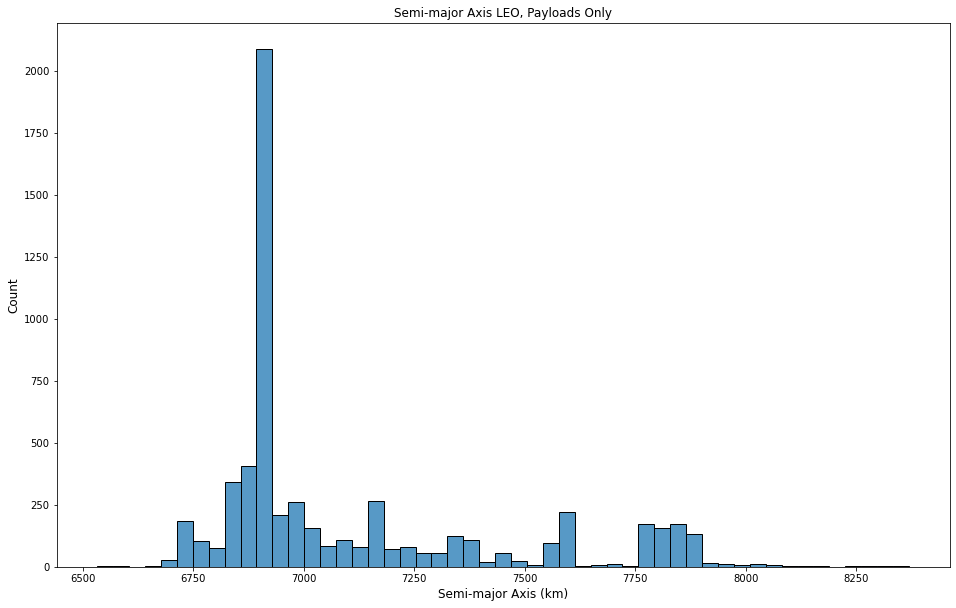

In [47]:
plt.figure(figsize=(16,10))
plt.title('Semi-major Axis LEO, Payloads Only',size=12)
plt.xlabel('Semi-major Axis (km)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df2[(df2['OBJECT_TYPE']=='PAYLOAD') & ((df2['SEMIMAJOR_AXIS']<=8371) & (df2['SEMIMAJOR_AXIS']>=6508))],x='SEMIMAJOR_AXIS');

The large concentration of satellites between 6600 km's and 7000 km's is due to the STARLINK constellations

In [48]:
df2[df2['OBJECT_NAME'].str.contains('STARLINK')].SEMIMAJOR_AXIS.describe()

count    1919.000000
mean     6899.249535
std        62.918786
min      6532.605000
25%      6925.306000
50%      6925.342000
75%      6925.361000
max      6950.462000
Name: SEMIMAJOR_AXIS, dtype: float64

Above description for all 'STARLINK' sats show that the concentration seen in the histogram is indeed that satellite constellation.

In [49]:
df_l=df2[(df2['OBJECT_TYPE']=='PAYLOAD') & (df2['SEMIMAJOR_AXIS']<=8371)].copy(deep=True)

In [50]:
df_al=df2[(df2['OBJECT_TYPE']=='PAYLOAD') & (df2['SEMIMAJOR_AXIS']<=100000) & (df2['SEMIMAJOR_AXIS']>=8371)].copy(deep=True)

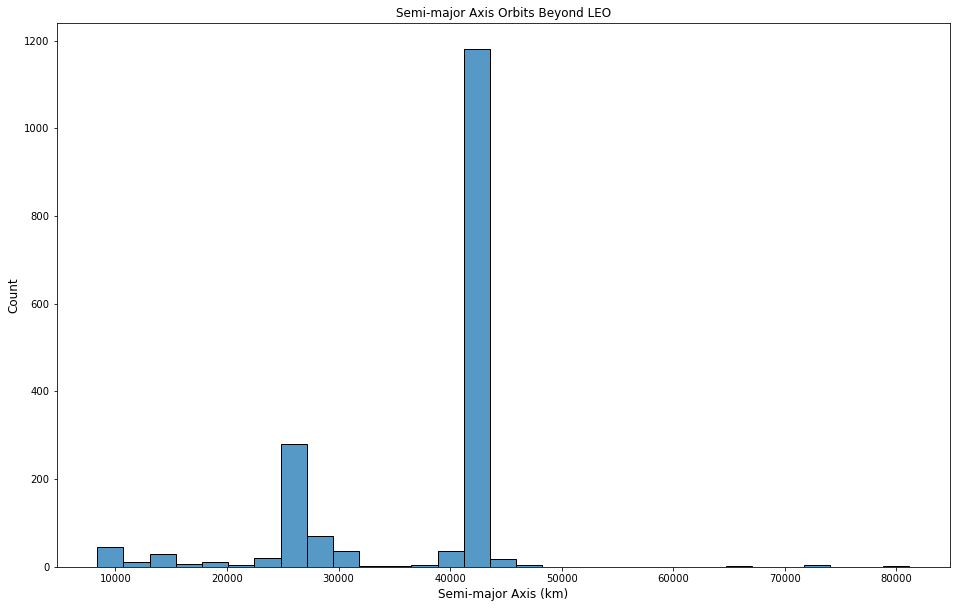

In [51]:
plt.figure(figsize=(16,10))
plt.title('Semi-major Axis Orbits Beyond LEO',size=12)
plt.xlabel('Semi-major Axis (km)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df_al,x='SEMIMAJOR_AXIS');

In [52]:
df.INCLINATION.describe()

count    23934.000000
mean        72.686518
std         29.024511
min          0.001600
25%         53.217400
50%         82.542650
75%         98.158575
max        144.639900
Name: INCLINATION, dtype: float64

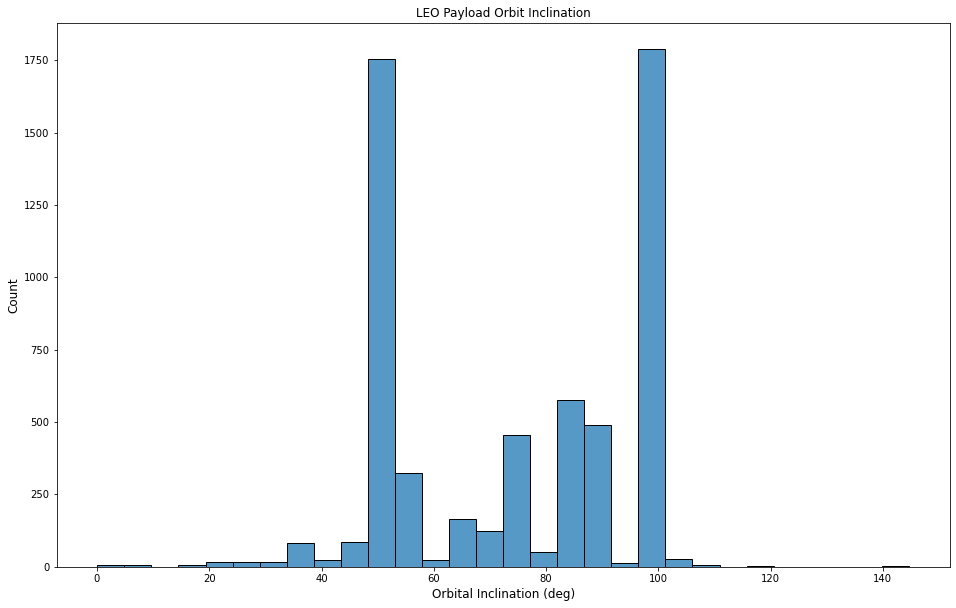

In [53]:
plt.figure(figsize=(16,10))
plt.title('LEO Payload Orbit Inclination',size=12)
plt.xlabel('Orbital Inclination (deg)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df_l,x='INCLINATION');

Satellites in low earth orbit inclinations are mostly all above 40 degrees, there is also a good number that are just beyond a polar orbit and are retrograde.

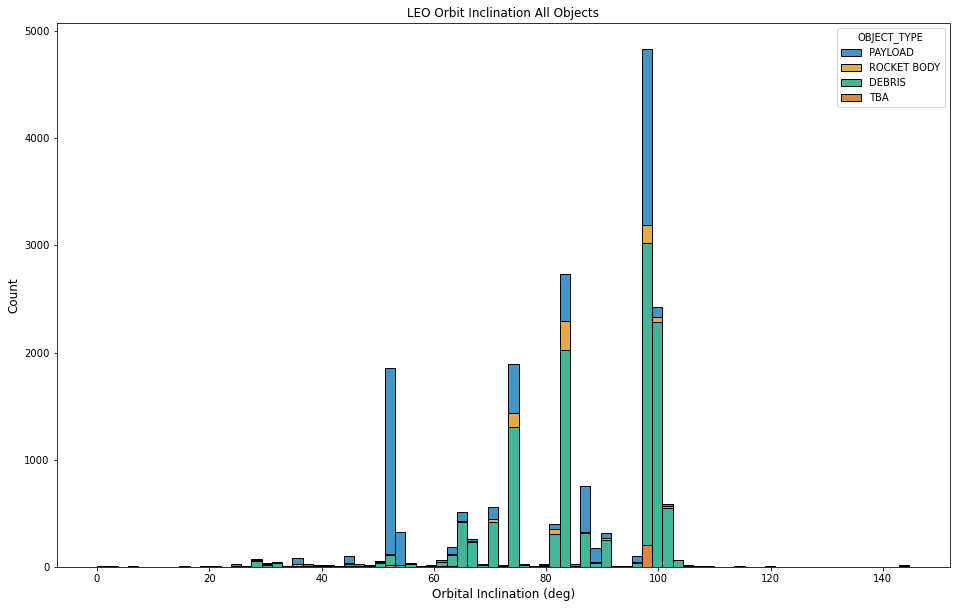

In [54]:
plt.figure(figsize=(16,10))
plt.title('LEO Orbit Inclination All Objects',size=12)
plt.xlabel('Orbital Inclination (deg)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df2[df2['SEMIMAJOR_AXIS']<=8371],x='INCLINATION',hue='OBJECT_TYPE',multiple='stack',palette='colorblind');

The large increase in counts at inclinations above 90 degree's shows how many nonpayload objects are in retrograde orbit in LEO.

<AxesSubplot:title={'center':'Medium to GEO Orbit Inclinations'}, xlabel='Orbital Inclination (deg)', ylabel='Count'>

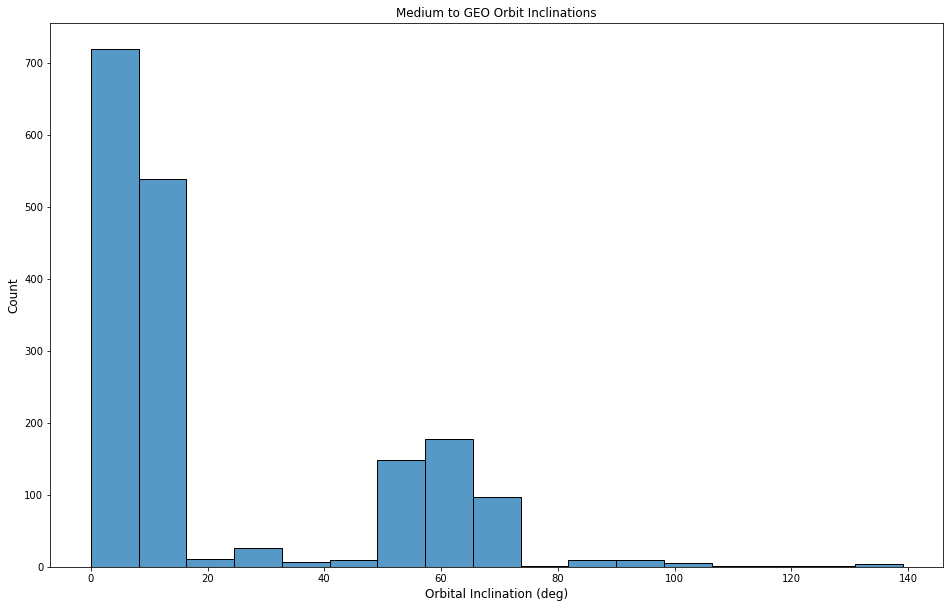

In [55]:
plt.figure(figsize=(16,10))
plt.title('Medium to GEO Orbit Inclinations',size=12)
plt.xlabel('Orbital Inclination (deg)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df_al,x='INCLINATION')

Satellites outside of low earth orbit are in far larger number close to equatorial or very low in inclination.

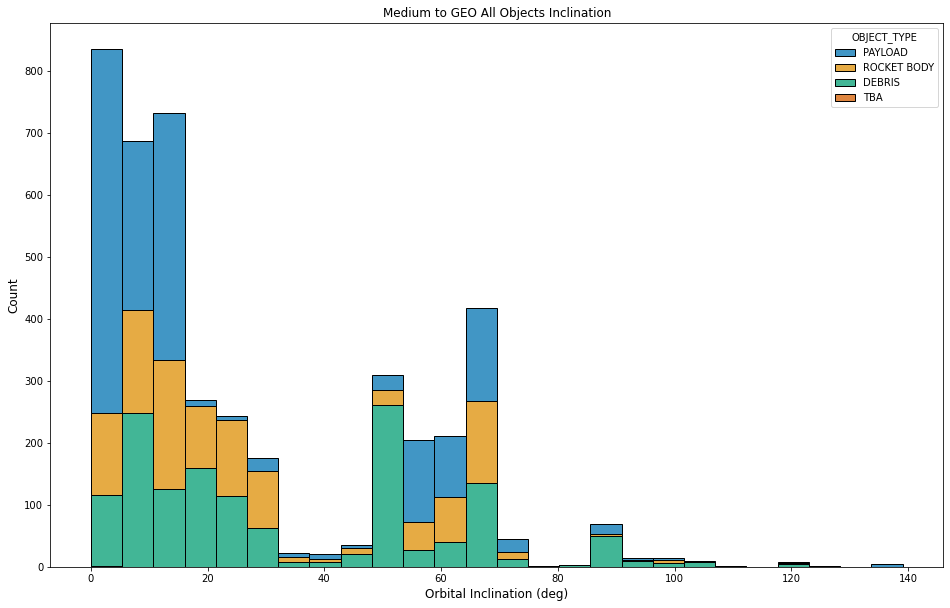

In [56]:
plt.figure(figsize=(16,10))
plt.title('Medium to GEO All Objects Inclination',size=12)
plt.xlabel('Orbital Inclination (deg)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=df2[df2['SEMIMAJOR_AXIS']>=8371],x='INCLINATION',hue='OBJECT_TYPE',multiple='stack',palette='colorblind');

In [57]:
df_al[df_al['INCLINATION']<10].PERIOD.describe()

count     825.000000
mean     1389.379120
std       216.646018
min       287.933000
25%      1436.083000
50%      1436.106000
75%      1436.889000
max      1636.867000
Name: PERIOD, dtype: float64

There is a reason most of the satellites in this slice of data have a period around ~1436 minutes, because this would put these satellites in geosynchronous orbit around earth (they rotate in sync with the Earth).  Useful for communication satellites as their position may remain very constant with the ground or trace out a predictable ground path. 